> # Titanic - Machine Learning from Disaster Competition

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading And Exploring Dataset

In [2]:
file_path = '../input/titanic/train.csv'
df = pd.read_csv(file_path)
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df['Survived'].value_counts() 

0    549
1    342
Name: Survived, dtype: int64

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


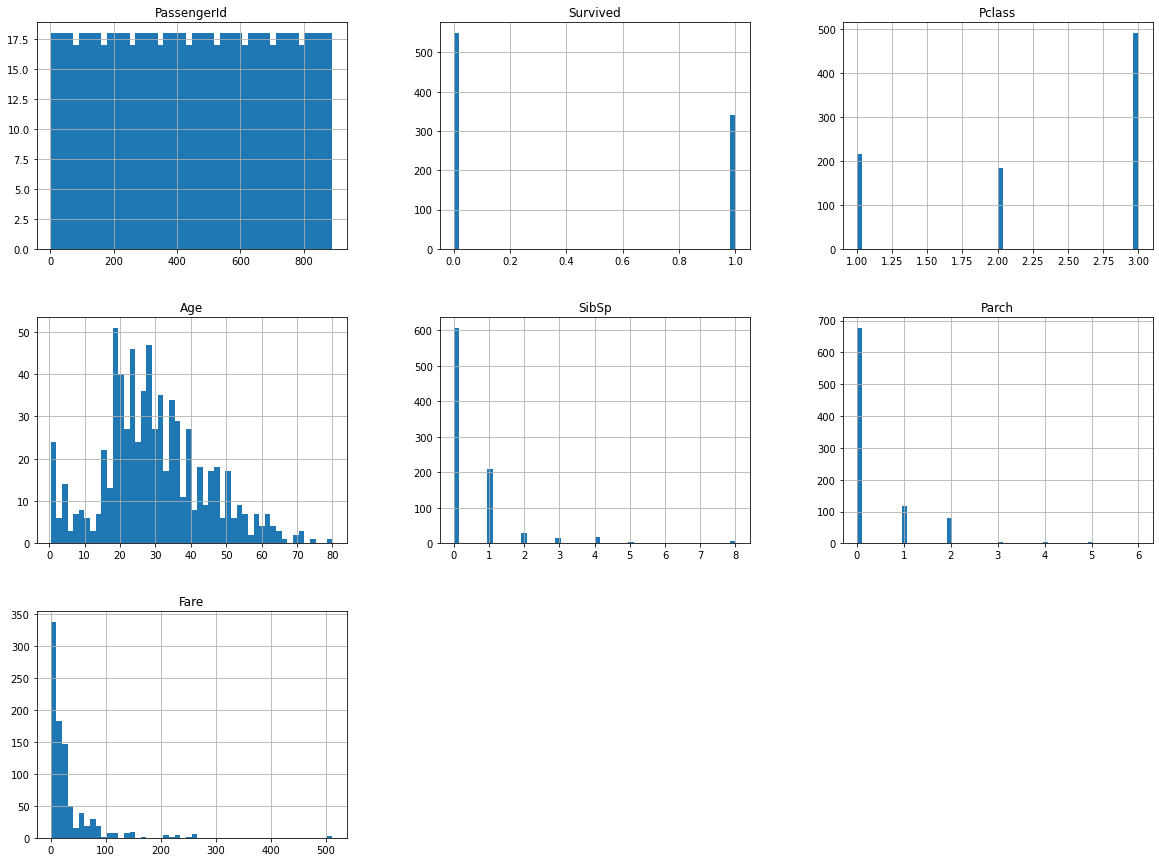

In [7]:
df.hist(bins=50, figsize=(20,15))
plt.show()

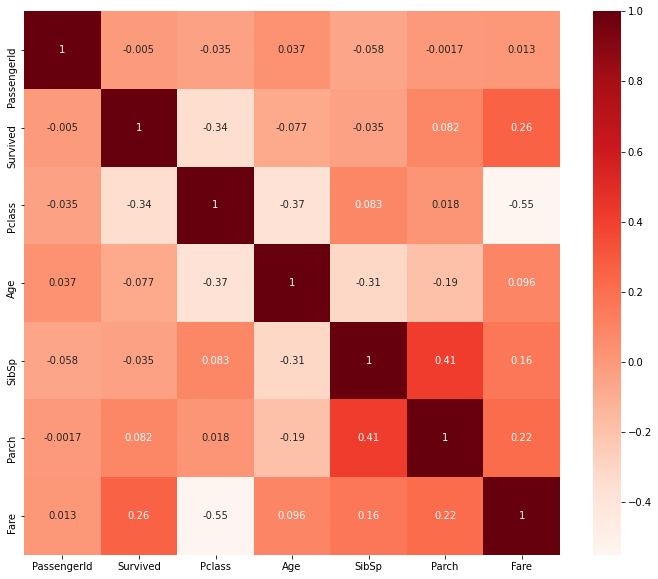

In [8]:
# data similiarity and correlation
import seaborn as sns
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [9]:
#Correlation with output variable
cor_target = abs(cor["Survived"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

Survived    1.000000
Pclass      0.338481
Fare        0.257307
Name: Survived, dtype: float64

### More Visualizations

<AxesSubplot:xlabel='Survived', ylabel='count'>

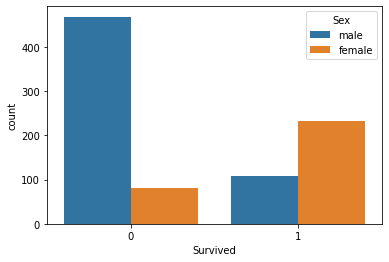

In [10]:
# how many males,females survived or not.
sns.countplot(x='Survived', hue='Sex' ,data=df)
#men died the most.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

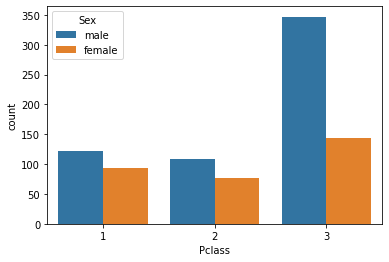

In [11]:
sns.countplot(x='Pclass', hue='Sex' ,data=df)
#class 3 was the most, which implies the kind of unrich normal people.
# class 1 the richest

<AxesSubplot:xlabel='Pclass', ylabel='count'>

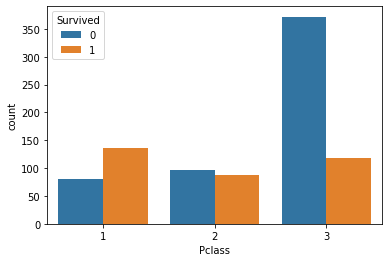

In [12]:
# which class was more affected by death? -- class 3
sns.countplot(x='Pclass', hue='Survived' ,data=df)

<AxesSubplot:xlabel='Age'>

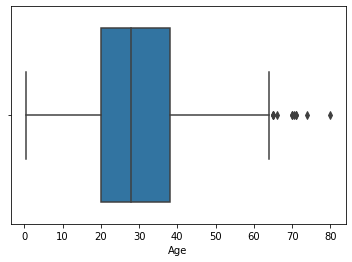

In [13]:
# checking Outliers 
sns.boxplot(x='Age', data=df)
# this is a small ammount of outliers. which indicates that median would be best fit for Nan

### Data Preprocessing

In [14]:
#Replacing Sex with 0 or 1
df['Sex'].replace('female',0,inplace=True)
df['Sex'].replace('male',1,inplace=True)
df.head()

# Replacing Embarked with s--0 , C 001 

df['Embarked'].replace('S',0,inplace=True)
df['Embarked'].replace('C',1,inplace=True)
df['Embarked'].replace('Q',2,inplace=True)

df.head()

# Note, if using KNN OR SVM, binarized is required.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0


In [15]:
# Handling Nan Values in Age
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
df['Age']=df['Age'].replace(np.NaN,df['Age'].median())
df.isnull().sum()



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
df['Embarked'].fillna(df['Embarked'].mode().item() , inplace = True) # mode is best for categorical data

In [19]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### Feature Engineering

In [20]:
# handling name
def extract_type(name):
    title= name.split(',')[1].split('.')[0]
    
    if (title.strip() == "Mr") :
        return 0 
    if (title.strip() == "Mrs") : 
        return 1 
    if (title.strip() == "Miss") :
        return 2
    else :
        return 3
   

df['NameType'] =  df['Name'].apply(extract_type)
df['NameType'] = pd.to_numeric(df['NameType'])

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameType
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,0.0,3
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,0.0,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,NaN,0.0,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,1.0,0


In [21]:
 #converting 0,1,2 data into dummy or indicator variables.
dummies = pd.get_dummies(df['NameType'], prefix='NameType')
df = pd.concat([df, dummies], axis=1)
df.rename({'NameType_0': 'Mr', 'NameType_1': 'Mrs','NameType_2': 'Miss'
           ,'NameType_3': 'Others'},
          axis=1, inplace=True)

df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameType,Mr,Mrs,Miss,Others
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,2,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0,1,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,0.0,3,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,0.0,2,0,0,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,NaN,0.0,2,0,0,1,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,1.0,0,1,0,0,0


In [22]:
# Merging SibSp and Parch as the total family members, they are correlated together but uncorrelated to survived, let's see if it makes a difference
df['FamilyMembers']=df['SibSp']+df['Parch']
#Fare is the same for the same ticket, which means it's the total price of the family, let's find fare per member
df['FarePerMember']=df['Fare']/(df['FamilyMembers']+1)
# this is an example that I got from the internet of feature engineering.
df['Age*Class']=df['Age']*df['Pclass']
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameType,Mr,Mrs,Miss,Others,FamilyMembers,FarePerMember,Age*Class
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0,0,1,0,0,0,1,3.62500,66.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0,1,0,1,0,0,1,35.64165,38.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,2,0,0,1,0,0,7.92500,78.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0,1,0,1,0,0,1,26.55000,35.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0,0,1,0,0,0,0,8.05000,105.0


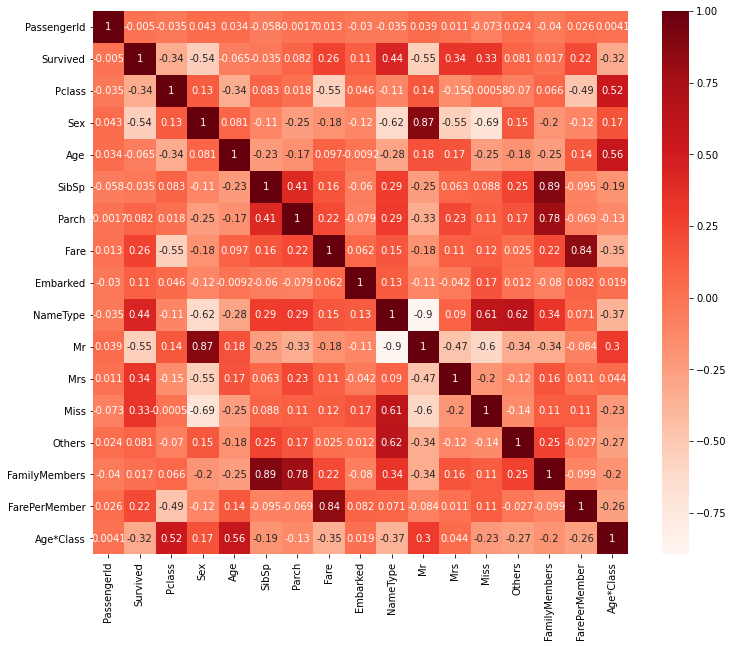

In [23]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Feature Selection

In [24]:
features = ['Age','Sex','FarePerMember','Mr','Age*Class','Miss','Pclass'] 
# this is where correlation come in handy
# to do try taking or leaving fare
train_x = df[features]
train_y=df['Survived']
train_x

,Age,Sex,FarePerMember,Mr,Age*Class,Miss,Pclass
0,22.0,1,3.62500,1,66.0,0,3
1,38.0,0,35.64165,0,38.0,0,1
2,26.0,0,7.92500,0,78.0,1,3
3,35.0,0,26.55000,0,35.0,0,1
4,35.0,1,8.05000,1,105.0,0,3
...,...,...,...,...,...,...,...
886,27.0,1,13.00000,0,54.0,0,2
887,19.0,0,30.00000,0,19.0,1,1
888,28.0,0,5.86250,0,84.0,1,3
889,26.0,1,30.00000,1,26.0,0,1


### Choosing The Best Model and Model Evaluation

In [25]:
# this models will used for choosing the best model among them.
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


#### K-Fold Cross Validation for Model Evaluation 

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
k_fold= KFold(n_splits=5, shuffle=True, random_state=0)

In [27]:
# trying on random forest
r_f = RandomForestClassifier(n_estimators=100)
score_rf = cross_val_score(r_f, train_x, train_y, cv=k_fold, n_jobs=1, scoring='accuracy')

rf=round(np.mean(score_rf)*100, 2)


In [28]:
#trying decision tree
d_t = DecisionTreeClassifier()
score_dt = cross_val_score(d_t, train_x, train_y, cv=k_fold, n_jobs=1, scoring='accuracy')
dt=round(np.mean(score_dt)*100, 2)

In [29]:
#trying svm
svm = SVC()
score_svm = cross_val_score(svm, train_x, train_y, cv=k_fold, n_jobs=1, scoring='accuracy')
sv=round(np.mean(score_svm)*100, 2)

In [30]:
#trying KNN
knn=KNeighborsClassifier(n_neighbors = 13)
score_knn = cross_val_score(knn, train_x, train_y, cv=k_fold, n_jobs=1, scoring='accuracy')
kn=round(np.mean(score_knn)*100, 2)

In [31]:
#trying naive bayes
nb = GaussianNB()
score_nb = cross_val_score(nb, train_x, train_y, cv=k_fold, n_jobs=1, scoring='accuracy')
nbb=round(np.mean(score_nb)*100, 2)

In [32]:
#trying Logistic Regression
lg = LogisticRegression()
score_lg = cross_val_score(lg, train_x, train_y, cv=k_fold, n_jobs=1, scoring='accuracy')
lgg=round(np.mean(score_lg)*100, 2)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [33]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',
              'Decision Tree'],
    'Score': [ sv, kn, 
              lgg, rf, nbb, 
              dt]})

In [34]:
results

,Model,Score
0,Support Vector Machines,69.58
1,KNN,70.93
2,Logistic Regression,78.34
3,Random Forest,80.81
4,Naive Bayes,78.67
5,Decision Tree,77.55


In [35]:
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(6)


,Model
Score,
80.81,Random Forest
78.67,Naive Bayes
78.34,Logistic Regression
77.55,Decision Tree
70.93,KNN
69.58,Support Vector Machines


### Choosing Random Forest As a Classifier

### Model Building Blocks

In [36]:
from sklearn.ensemble import RandomForestClassifier
#model = RandomForestClassifier(random_state=42)
#model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model = RandomForestClassifier(n_estimators=100, max_depth=5,
min_samples_leaf= 1,min_samples_split= 2, random_state=42,max_features= 'auto',
 max_leaf_nodes=None)
"""
Hyper Parameters:
n_estimators = number of trees in the foreset
max_features = max number of features considered for splitting a node
max_depth = max number of levels in each decision tree
min_samples_split = min number of data points placed in a node before the node is split
min_samples_leaf = min number of data points allowed in a leaf node
bootstrap = method for sampling data points (with or without replacement)
"""

'\nHyper Parameters:\nn_estimators = number of trees in the foreset\nmax_features = max number of features considered for splitting a node\nmax_depth = max number of levels in each decision tree\nmin_samples_split = min number of data points placed in a node before the node is split\nmin_samples_leaf = min number of data points allowed in a leaf node\nbootstrap = method for sampling data points (with or without replacement)\n'

### Model Training

In [37]:
model.fit(train_x,train_y)


RandomForestClassifier(max_depth=5, random_state=42)

### Feature Importance 

In [38]:
importances = pd.DataFrame({'feature':train_x.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)
#re Running again above by reselecting features

,importance
feature,
Sex,0.280
Mr,0.233
FarePerMember,0.145
Age*Class,0.130
Pclass,0.101
Age,0.075
Miss,0.037


### Model Evaluation and Testing

In [39]:
file_path = '../input/titanic/test.csv'
test_df = pd.read_csv(file_path)
test_df['Age']=test_df['Age'].replace(np.NaN,test_df['Age'].mean())
test_df['Sex'].replace('female',0,inplace=True)
test_df['Sex'].replace('male',1,inplace=True)
test_df['Fare']=test_df['Fare'].replace(np.NaN,df['Fare'].mean())

test_df['FamilyMembers']=test_df['SibSp']+test_df['Parch']

test_df['FarePerMember']=test_df['Fare']/(test_df['FamilyMembers']+1)

test_df['Embarked'].replace('S',0,inplace=True)
test_df['Embarked'].replace('C',1,inplace=True)
test_df['Embarked'].replace('Q',2,inplace=True)

test_df['Age*Class']=test_df['Age']*test_df['Pclass']


test_df['NameType'] =  test_df['Name'].apply(extract_type)
test_df['NameType'] = pd.to_numeric(test_df['NameType'])
dummies = pd.get_dummies(test_df['NameType'], prefix='NameType')
test_df = pd.concat([test_df, dummies], axis=1)
test_df.rename({'NameType_0': 'Mr', 'NameType_1': 'Mrs','NameType_2': 'Miss'
           ,'NameType_3': 'Others'},
          axis=1, inplace=True)




test_x = test_df[features]
test_x


                      


,Age,Sex,FarePerMember,Mr,Age*Class,Miss,Pclass
0,34.50000,1,7.829200,1,103.500000,0,3
1,47.00000,0,3.500000,0,141.000000,0,3
2,62.00000,1,9.687500,1,124.000000,0,2
3,27.00000,1,8.662500,1,81.000000,0,3
4,22.00000,0,4.095833,0,66.000000,0,3
...,...,...,...,...,...,...,...
413,30.27259,1,8.050000,1,90.817771,0,3
414,39.00000,0,108.900000,0,39.000000,0,1
415,38.50000,1,7.250000,1,115.500000,0,3
416,30.27259,1,8.050000,1,90.817771,0,3


In [40]:

test_df.isnull().sum()


PassengerId        0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            327
Embarked           0
FamilyMembers      0
FarePerMember      0
Age*Class          0
NameType           0
Mr                 0
Mrs                0
Miss               0
Others             0
dtype: int64

In [41]:
#predictions = model.predict(test_x)

#output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
#output.to_csv('my_submission6.csv', index=False)




### Hyper-Parameters Tuning

In [42]:
"""

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(model, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(train_x, train_y)
"""

'\n\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.ensemble import RandomForestClassifier\nmodel = RandomForestClassifier(random_state=42)\nn_estimators = [100, 300, 500, 800, 1200]\nmax_depth = [5, 8, 15, 25, 30]\nmin_samples_split = [2, 5, 10, 15, 100]\nmin_samples_leaf = [1, 2, 5, 10] \n\nhyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  \n              min_samples_split = min_samples_split, \n             min_samples_leaf = min_samples_leaf)\n\ngridF = GridSearchCV(model, hyperF, cv = 3, verbose = 1, \n                      n_jobs = -1)\nbestF = gridF.fit(train_x, train_y)\n'

In [43]:
#bestF.get_params()

In [44]:
"""
#these parameters were obtained from gridSearch
model = RandomForestClassifier(n_estimators=100, max_depth=5,
min_samples_leaf= 1,min_samples_split= 2, random_state=42,max_features= 'auto',
 max_leaf_nodes=None)
model.fit(train_x,train_y)

"""


"\n#these parameters were obtained from gridSearch\nmodel = RandomForestClassifier(n_estimators=100, max_depth=5,\nmin_samples_leaf= 1,min_samples_split= 2, random_state=42,max_features= 'auto',\n max_leaf_nodes=None)\nmodel.fit(train_x,train_y)\n\n"

In [45]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(accuracy_score(train_y, model.predict(train_x)))
# i think this is a good accuracy not overfitting the data


0.8731762065095399


In [46]:
predictions = model.predict(test_x)

output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('my_submission_DONE.csv', index=False)


